<a href="https://colab.research.google.com/github/Rujan0833/DM_DW_LAB/blob/main/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib ta requests

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=2726fd0106085f56e4f3af3c4c7774ed3cb53d83126214a7e26a3e4b43be8176
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import requests
import pandas as pd
import os

# List of 10 commercial banks in NEPSE (symbols)
symbols = ["ADBL", "BOKL", "CBL", "CZBIL", "EBL", "GBIME", "KBL", "MBL", "NABIL", "SBI"]
from_date = "2025-04-19"
to_date = "2025-05-19"

def fetch_stock_data(symbol):
    url = f"https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol={symbol}&fromDate={from_date}&toDate={to_date}&pageNo=1&itemsPerPage=100&pagePerDisplay=5"
    response = requests.get(url)
    data = response.json()['result']['data'] #extract data field of result key
    df = pd.DataFrame(data)[['tradeDateString','closingPrice','maxPrice','minPrice','volume','previousClosing']]
    df['tradeDateString'] = pd.to_datetime(df['tradeDateString'])
    df['closingPrice'] = pd.to_numeric(df['closingPrice'])


    print(df.tail(5))#last 5 rows display garne
    df.to_csv(f'{symbol}_stock_data.csv',index=False)


fetch_stock_data("EBL")

   tradeDateString  closingPrice  maxPrice  minPrice  volume  previousClosing
15      2025-04-24        620.63     624.0     613.0   46983           622.59
16      2025-04-23        622.59     635.0     622.0   84744           631.09
17      2025-04-22        631.09     635.0     628.0   40770           631.11
18      2025-04-21        631.11     635.0     622.1   74610           625.05
19      2025-04-20        625.05     631.0     620.0   63635           619.09


In [ ]:
# Load the saved CSV
df = pd.read_csv("EBL_stock_data.csv")

df['Symbol'] = "EBL"

# Rename and clean
df.rename(columns={
    'tradeDateString': 'Date',
    'closingPrice': 'Close',
    'volume': 'Volume'
}, inplace=True)

# Convert date
df['Date'] = pd.to_datetime(df['Date'])

# Keep essential columns
df = df[['Date', 'Symbol', 'Close', 'Volume']]

# Sort by date
EBL_df = df.sort_values("Date").reset_index(drop=True)
EBL_df.head()

,Date,Symbol,Close,Volume
0,2025-04-20,EBL,625.05,63635
1,2025-04-21,EBL,631.11,74610
2,2025-04-22,EBL,631.09,40770
3,2025-04-23,EBL,622.59,84744
4,2025-04-24,EBL,620.63,46983


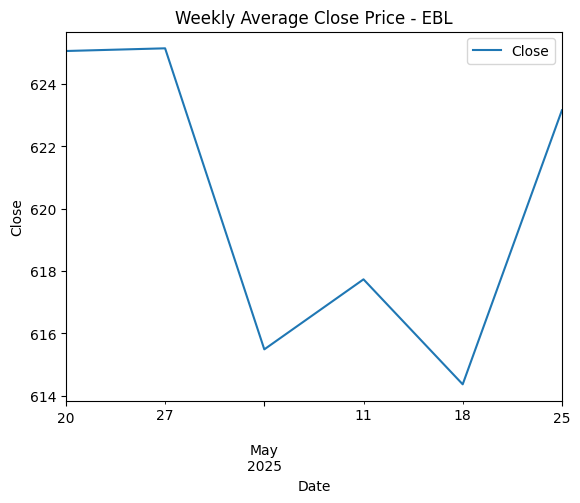

/tmp/ipython-input-8-924944829.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = EBL_df.resample('M').agg({'Close': 'mean'})


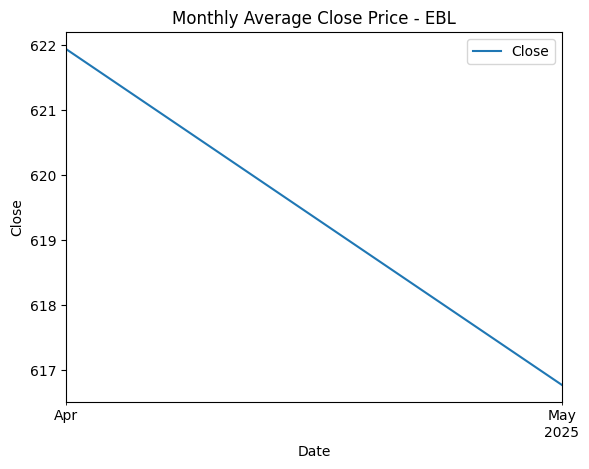

In [ ]:
import matplotlib.pyplot as plt

# Set Date as index
EBL_df.set_index('Date', inplace=True)

# Weekly
weekly = EBL_df.resample('W').agg({'Close': 'mean'})
weekly.plot(title="Weekly Average Close Price - EBL", ylabel="Close")
plt.show()

# Monthly
monthly = EBL_df.resample('M').agg({'Close': 'mean'})
monthly.plot(title="Monthly Average Close Price - EBL", ylabel="Close")
plt.show()

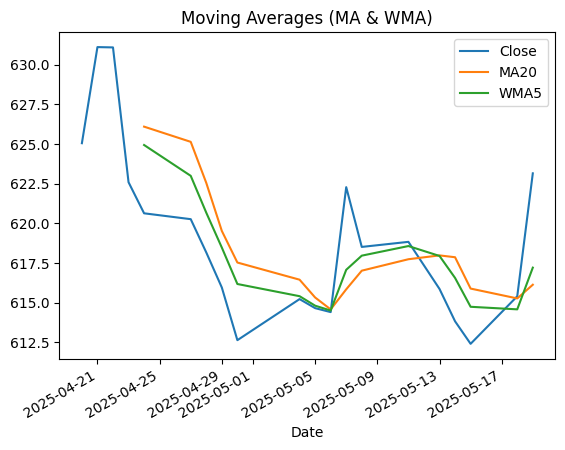

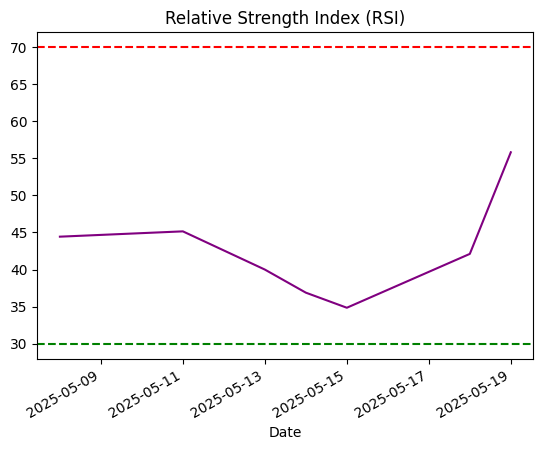

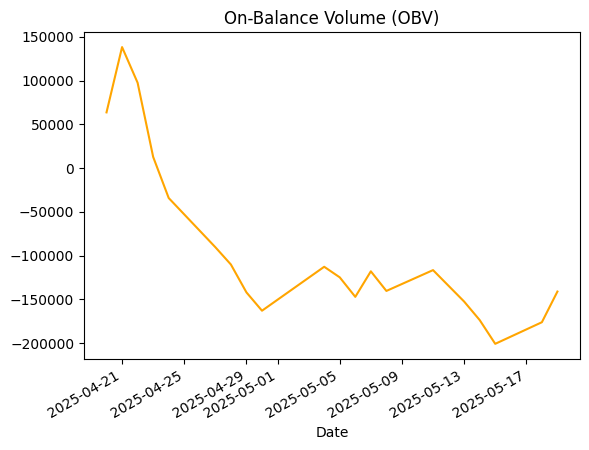

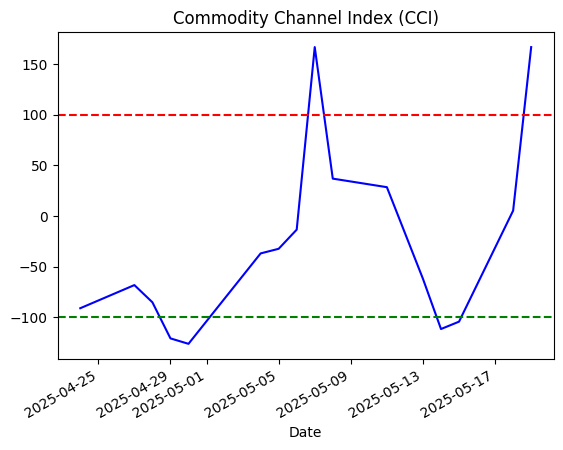

In [ ]:
import ta

# Reset index to use ta functions
EBL_df.reset_index(inplace=True)

# Moving Average (SMA)
EBL_df['MA20'] = ta.trend.sma_indicator(EBL_df['Close'], window=5)

# Weighted Moving Average (manually calculated)
weights = list(range(1, 6))
EBL_df['WMA5'] = EBL_df['Close'].rolling(window=5).apply(lambda prices: sum(w*p for w, p in zip(weights, prices)) / sum(weights), raw=True)

# RSI
EBL_df['RSI'] = ta.momentum.rsi(EBL_df['Close'], window=14)

# OBV
EBL_df['OBV'] = ta.volume.on_balance_volume(EBL_df['Close'], EBL_df['Volume'])

# CCI
EBL_df['CCI'] = ta.trend.cci(high=EBL_df['Close'], low=EBL_df['Close'], close=EBL_df['Close'], window=5)

# Plot MA + WMA
EBL_df.set_index("Date")[['Close', 'MA20', 'WMA5']].plot(title="Moving Averages (MA & WMA)")
plt.show()

# Plot RSI
EBL_df.set_index("Date")['RSI'].plot(title="Relative Strength Index (RSI)", color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()

# Plot OBV
EBL_df.set_index("Date")['OBV'].plot(title="On-Balance Volume (OBV)", color='orange')
plt.show()

# Plot CCI
EBL_df.set_index("Date")['CCI'].plot(title="Commodity Channel Index (CCI)", color='blue')
plt.axhline(100, color='red', linestyle='--')
plt.axhline(-100, color='green', linestyle='--')
plt.show()
